In [1]:
cd /home/drew/NBOH/Marzuoli

/scr/drew/Serotonin/6WHA/equilibration/tryIonicCapsInSolvent/di-S-bond_ECL3/6WGTTmplt4EXL3/Desmond/Hirshfeld/retry/blockMembraneBackdoor/retry/Marzuoli


In [2]:
import bioinf as bi
import numpy as np
import pandas as pd

group_1 = "watergate"
group_2 = "Water"
group_1_header = f'[ {group_1} ]'
group_2_header = f'[ {group_2} ]'
hbond_indices_header = f'[ hbonds_{group_1}-{group_2} ]'

hbonds = []
group_1_ndx = []
group_2_ndx = []

with open('hbond.ndx') as f:
    readBondIds = False
    hbonds = []
    
    while f.readline().strip() != group_1_header:
        pass
    for line in f:
        cleanline = line.strip()
        if cleanline.startswith('['):
            break
        group_1_ndx += cleanline.split()
    while f.readline().strip() != group_2_header:
        pass
    for line in f:
        cleanline = line.strip()
        if cleanline.startswith('['):
            break
        group_2_ndx += cleanline.split()
    while f.readline().strip() != hbond_indices_header:
        pass
    for line in f:
        cleanline = line.strip()
        donor,hydrogen,acceptor = cleanline.split()
        hbonds.append({'donor': donor, 'acceptor': acceptor})

with open('md_0_1.pdb') as f:
    for line in f:
        cleanline = line.strip()
        if cleanline.split()[0] not in ['ATOM', 'HETATM']:
            continue
        atomLine = bi.PDBAtomLine.parse_string(cleanline)
        hbondPartner = f'{atomLine.resName}{atomLine.resSeq if atomLine.serial not in group_1_ndx else ""}_{atomLine.name}'
        for hbond in hbonds:
            for key,value in hbond.items():
                hbond[key] = hbondPartner if atomLine.serial == value else value
                
with open('hbmap.xpm') as f:
    x = np.array([])
    z = None
    should_read_z_values = False
    for line in f:
        cleanline = line.strip()
        # /* x-axis:  0 10 20 30 40 50 60 70 80 90 100 ... */
        if cleanline.startswith('/* x-axis:'):
            x_str = cleanline.split()[2:-1]
            x = np.append(x, [float(s) for s in x_str])
        if cleanline.startswith('/* y-axis:'):
            should_read_z_values = True
            z = np.empty(shape=(0, len(x)), dtype=int)
            continue
        if not should_read_z_values:
            continue
        z = np.append(z, [[1 if c == 'o' else 0 for c in cleanline.strip('",')]], axis=0)
        
df = pd.DataFrame(z.T, index=x, columns=[f'{item["donor"]}-{item["acceptor"]}' for item in hbonds])

In [4]:
df.describe()

,SOL972_OW-ASPH_OD2,SOL972_OW-SER_OG,SOL972_OW-ASN_ND2,SOL2601_OW-ASPH_OD2,SOL2601_OW-SER_OG,SOL2601_OW-ASN_ND2,SOL3700_OW-SER_OG,SOL3700_OW-ASN_ND2,SOL4741_OW-ASPH_OD2,SOL4741_OW-SER_OG,...,SOL4767_OW-SER_OG,SOL4767_OW-ASN_ND2,SOL5628_OW-ASN_ND2,SOL6339_OW-ASPH_OD2,SOL6339_OW-SER_OG,SOL6339_OW-ASN_ND2,SOL6515_OW-SER_OG,SOL7012_OW-ASPH_OD2,SOL7012_OW-SER_OG,SOL7012_OW-ASN_ND2
count,25001.000000,25001.000000,25001.000000,25001.00000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,...,25001.000000,25001.00000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000
mean,0.001080,0.053998,0.000320,0.00064,0.001160,0.063437,0.000680,0.000120,0.000520,0.340306,...,0.063557,0.00064,0.000080,0.000600,0.000200,0.097516,0.000080,0.000480,0.111516,0.000120
std,0.032846,0.226018,0.017886,0.02529,0.034039,0.243753,0.026068,0.010954,0.022798,0.473822,...,0.243968,0.02529,0.008944,0.024488,0.014141,0.296665,0.008944,0.021904,0.314776,0.010954
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

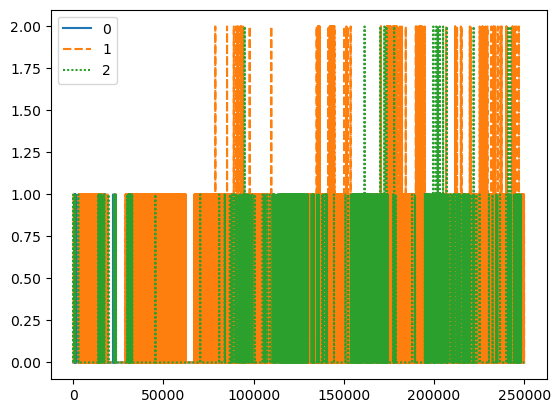

In [86]:
import seaborn as sb
acceptor_count = {}
acceptors = set([])
donor_for_header = {}
headers_for_acceptor = {}
for header in df:
    donor, acceptor = header.split('-')
    acceptors.add(acceptor)
    these_acceptors = headers_for_acceptor.get(acceptor, [])
    these_acceptors.append(header)
    headers_for_acceptor[acceptor] = these_acceptors
    donor_for_header[header] = donor
    acceptor_count[donor] = acceptor_count.get(donor, 0) + 1
donors = [key for key, value in acceptor_count.items() if value > 2]
#headers_for_acceptor = {acceptor: [a for a in df if a.endswith(acceptor)] for acceptor in acceptors}
sb.lineplot(pd.DataFrame([df[headers_for_acceptor[acceptor]].T.sum() for acceptor in acceptors]).T)

<AxesSubplot: >

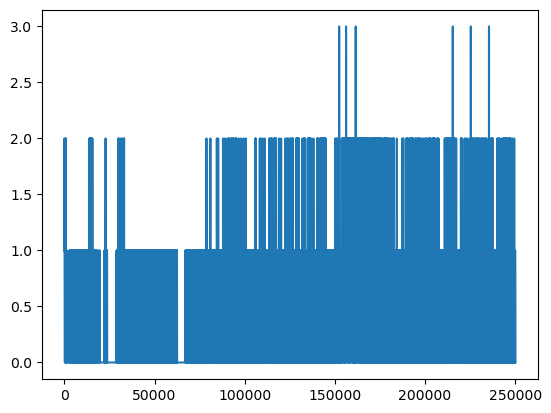

In [102]:
sb.lineplot(pd.DataFrame([df[headers_for_acceptor[acceptor]].T.sum() for acceptor in acceptors]).sum())

In [93]:
def count_runs_of_heads(a):
    runs = []
    count = 0
    prior_element = a[0]
    for element in a:
        count += element
        if element == 0 and prior_element == 1:
            runs.append(count)
            count = 0
        prior_element = element
    if a.iloc[-1] == 1:
        runs.append(count)
    return runs

In [17]:
def heads_counts_df_for(df):
    counts = pd.DataFrame(dtype=int)
    for column in df:
        counts = pd.concat([counts,pd.Series(count_runs_of_heads(df[column]), dtype=int)],axis=1)
    counts.columns = df.columns
    return counts

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

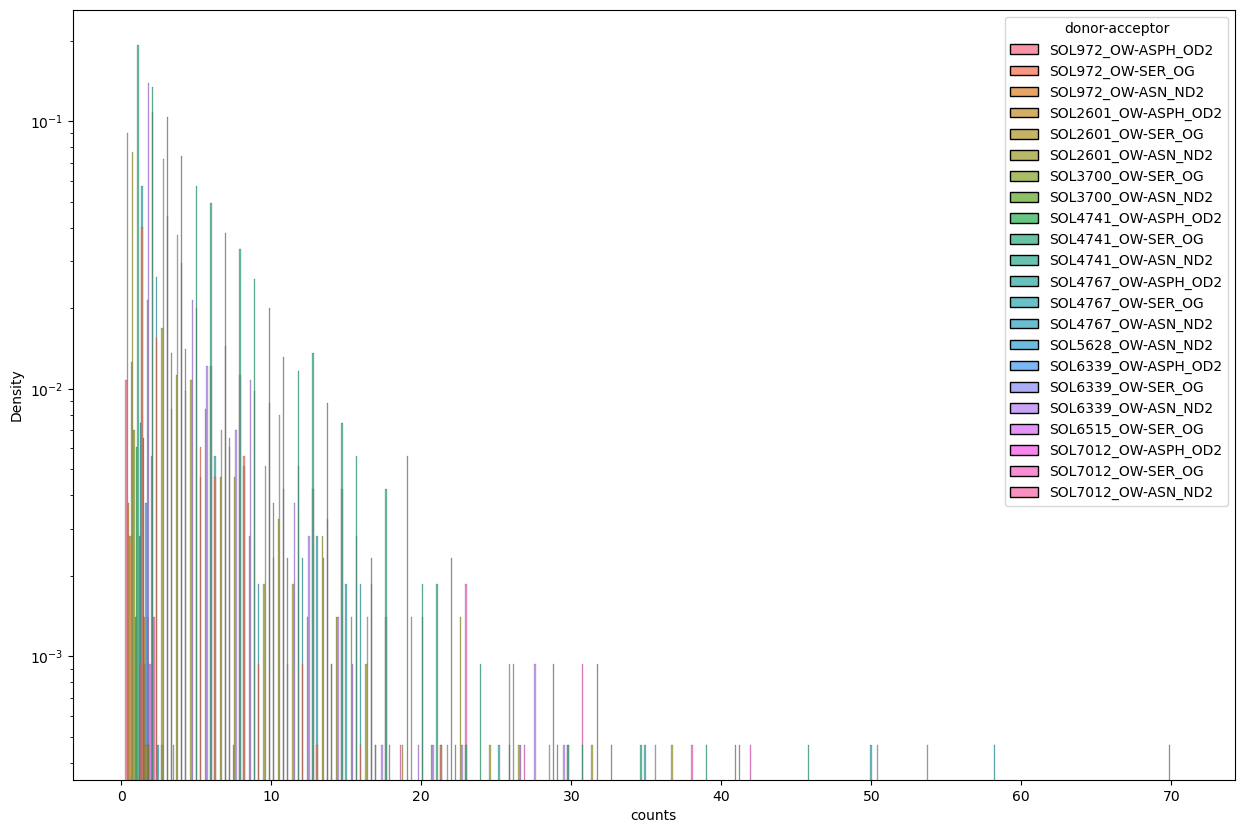

In [26]:
plot = plt.figure(figsize=(15, 10))
counts=heads_counts_df_for(df)
sb.histplot(pd.melt(counts,value_vars=df.columns, var_name='donor-acceptor', value_name='counts'), x='counts', log_scale=(False,True), hue="donor-acceptor", multiple='dodge', stat="density", shrink=4)
plt.savefig(f'test.png', dpi=300)

In [28]:
pd.melt(df, value_vars=df.columns, var_name='donor-acceptor', value_name='m')

,donor-acceptor,m
0,SOL972_OW-ASPH_OD2,0
1,SOL972_OW-ASPH_OD2,0
2,SOL972_OW-ASPH_OD2,0
3,SOL972_OW-ASPH_OD2,0
4,SOL972_OW-ASPH_OD2,0
...,...,...
550017,SOL7012_OW-ASN_ND2,0
550018,SOL7012_OW-ASN_ND2,0
550019,SOL7012_OW-ASN_ND2,0
550020,SOL7012_OW-ASN_ND2,0


In [29]:
def make_weights(mcs=1000):
    runs = range(1, int(counts.max().max()) + 1)
    options = [False, True]
    tosses = len(df)
    return [np.average(np.array([np.sum(np.array(count_runs_of_heads(pd.Series(np.random.choice(options, size=tosses))))==run) for _ in range(mcs)])) for run in runs]

In [ ]:
import time 
mcs = 10
weights = np.array([0])
then = time.time()
while np.any(weights == 0): 
    mcs *= 10
    print(mcs)
    weights = np.array(make_weights(mcs))
    print(weights)
    now = time.time()
    print(now - then)
    then = now
sb.lineplot(y=weights, x=range(len(weights)))

100
[3.11872e+03 1.55879e+03 7.80350e+02 3.91770e+02 1.95350e+02 9.85800e+01
 4.87400e+01 2.49800e+01 1.23200e+01 6.06000e+00 2.97000e+00 1.39000e+00
 7.80000e-01 3.90000e-01 1.50000e-01 1.00000e-01 7.00000e-02 1.00000e-02
 0.00000e+00 2.00000e-02 1.00000e-02 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
24.718895196914673
1000
[3.126661e+03 1.561995e+03 7.815940e+02 3.902240e+02 1.952710e+02
 9.762400e+01 4.896700e+01 2.409600e+01 1.206800e+01 

In [88]:
import math
def heads_runs_weighted_histos(df, x_scale = 100):
    counts = heads_counts_df_for(df)
    weighted_histos = {}
    runs = range(1, int(counts.max().max()) + 1)
    xs = None
    for header in counts:
        histogram,xs = np.histogram(counts[header].dropna(), runs, density=False)
        weights = np.array([math.log(pow(2, i + 2)/i) for i in range(1, len(histogram) + 1)], dtype=float) / len(df)
        weighted_histos[header] = histogram * weights
    return pd.DataFrame(weighted_histos, index = xs[:-1] / x_scale)

In [89]:
weighted_histos_ATB = heads_runs_weighted_histos(df_ATB)

In [90]:
weighted_histos_ATB

,CMYH_N15-ASP155_OD1,CMYH_N15-ASP155_OD2,CMYH_N15-SER159_OG,CMYH_O23-ASP155_OD1,CMYH_O23-ASP155_OD2,CMYH_O23-SER159_OG,SER159_OG-CMYH_O02
0.01,0.000333,0.031024,0.124845,0.118108,0.013142,0.099310,0.090494
0.02,0.000000,0.008816,0.048075,0.048158,0.007236,0.031274,0.026865
0.03,0.000000,0.006060,0.031813,0.033801,0.005586,0.016001,0.016569
0.04,0.000000,0.002994,0.023400,0.023178,0.004103,0.011866,0.011201
0.05,0.000000,0.001297,0.022568,0.017250,0.002594,0.007133,0.007652
...,...,...,...,...,...,...,...
0.64,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.67,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [91]:
def plot_histos(df, color="turquoise", fig_name=None):
    plot = plt.figure(figsize=(15, 10))
    gs = plot.add_gridspec(3,3, hspace = 0.5)
    for i,header in enumerate(df):
        histo = df[header]
        ax = plot.add_subplot(gs[i])
        #ax.title = histo.name
        indices = df.index
        mindex = min(indices)
        maxdex = max(indices)
        dexrange = maxdex - mindex
        ddex = dexrange / 10
        g = sb.barplot(y=histo, x=indices, ax=ax, color=color)
        g.set_xticks(np.arange(0, 70, 10))
        g.set_title(header)
        g.set_ylabel("frequency")
#         g.set_yscale("log")
        g.set_xlabel("t (ns)")
    if fig_name:
        plt.savefig(fig_name, dpi=300)

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.6

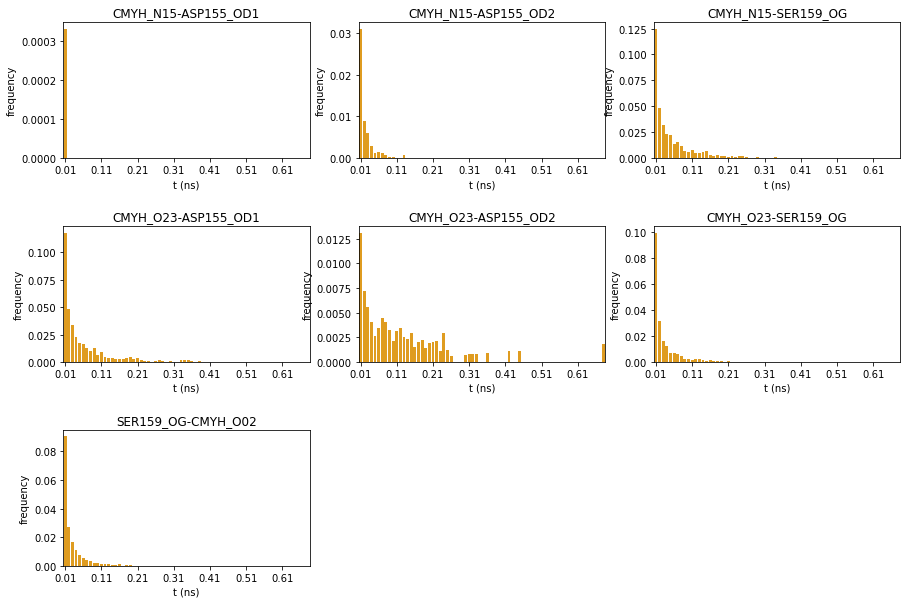

In [92]:
plot_histos(weighted_histos_ATB, color="orange", fig_name="DistributionOfDurationsOfHbonds_Hirshfeld.png")

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.6

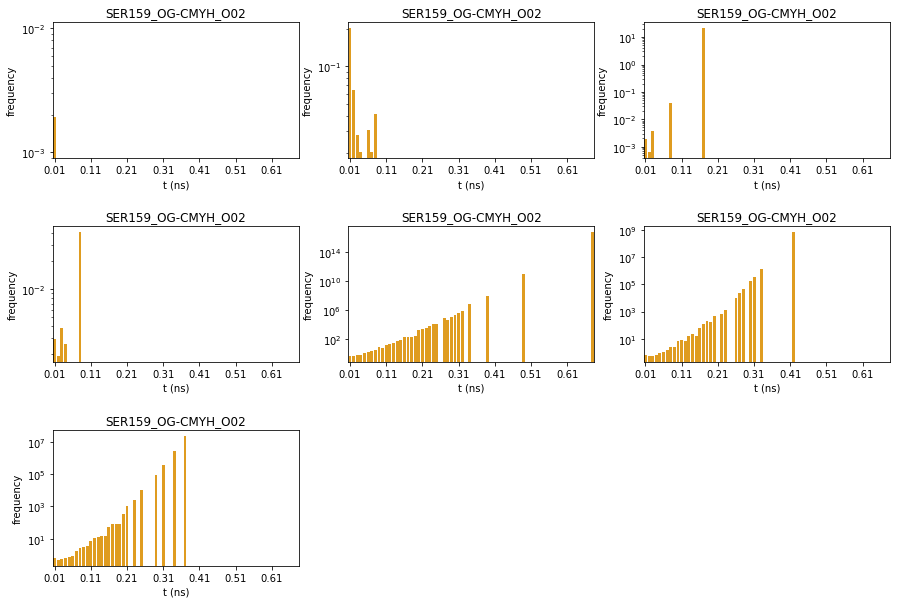

In [30]:
plot_weighted_histos(weighted_histos_Hirshfeld, color="orange")